# Solution to Multi-dimensional linear regression

In [2]:
# Two-dimensional soluion

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [4]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
# Load the data-
X= []
Y = []
for line in open('data_2d.csv'):
    x1, x2, y = line.split(',')
    X.append([float(x1), float(x2), 1])  # add the bias term 1
    Y.append(float(y))

In [14]:
X[0:3]

[[17.9302012052, 94.5205919533, 1],
 [97.1446971852, 69.5932819844, 1],
 [81.7759007845, 5.73764809688, 1]]

In [16]:
Y[0:3]

[320.259529602, 404.634471526, 181.485107741]

In [17]:
# Turning X and Y into numpy arrays
X =  np.array(X)
Y = np.array(Y)

In [22]:
X[0:3]

array([[ 17.93020121,  94.52059195,   1.        ],
       [ 97.14469719,  69.59328198,   1.        ],
       [ 81.77590078,   5.7376481 ,   1.        ]])

In [23]:
Y[0:3]

array([ 320.2595296 ,  404.63447153,  181.48510774])

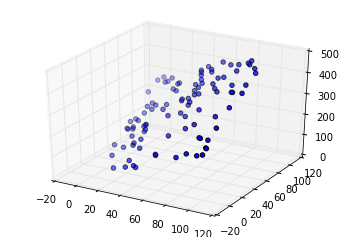

In [24]:
# Let's plot the data-
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()

In [25]:
# Calculate weights
# The the solution for thsi is below-
# w = (Xtarnspose X)inverse (Xtranspose T)

# A general linear system Ax = b can be solved for x = Ainverse b

# so, in our case, Ainverse => (Xtarnspose X) ; b => (Xtranspose T) ; x => w

w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = np.dot(X, w)

In [26]:
w  # three weights for x0, x1 and x2

array([ 2.01666793,  2.96985048,  1.46191241])

In [30]:
Yhat[0:10]  # all the predicted values

array([ 318.33319994,  404.05215029,  183.41670624,  322.95898681,
        324.09531924,   94.78736642,  356.51965828,  184.7045282 ,
        421.36398156,  372.89003776])

In [31]:
# Compute r-squared-
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - np.dot(d1, d1) / np.dot(d2, d2)
print("The R-squared is :", r2)

The R-squared is : 0.998004061248


# Polynomial Regression : Extending linear regression

In [38]:
# load the data
X = []
Y = []
for line in open('data_poly.csv'):
    x, y = line.split(',')
    x = float(x)
    X.append([1, x, x*x])
    Y.append(float(y))

In [39]:
X[0:3]

[[1, 76.7007086033, 5882.9987002483385],
 [1, 95.2735441552, 9077.048215892844],
 [1, 73.0957232493, 5342.984757338256]]

In [41]:
Y[0:3]

[663.797275569, 1014.3622816, 618.938826916]

In [42]:
X = np.array(X)
Y = np.array(Y)

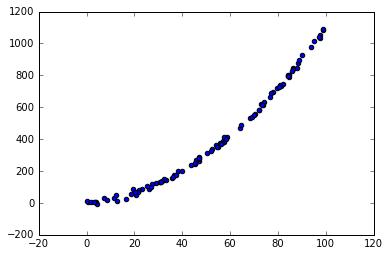

In [43]:
# Let's plot
plt.scatter(X[:, 1], Y)
plt.show() # Y is nonlinear in x, so in regression we have also added a quadratic term

In [44]:
# Calculate weights-
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = np.dot(X, w)

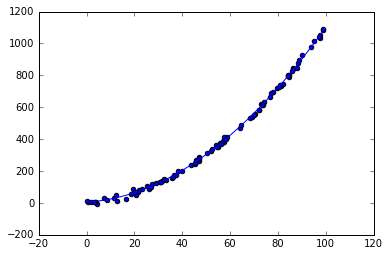

In [50]:
# Plot it all together
plt.scatter(X[:, 1], Y)
plt.plot(sorted(X[:, 1]), sorted(Yhat))
plt.show()

In [51]:
# The qudratic curve goes through most of the points. So, the fit is very good.

In [52]:
# Compute r-squared-
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - np.dot(d1, d1) / np.dot(d2, d2)
print("The R-squared is :", r2)

The R-squared is : 0.999141229637


# Another Example : Predicting Systolic Blood Pressure

In [53]:
import pandas as pd

In [54]:
# The data (x1, x2, x3) are for each patient.
# x1 = systolic blood pressure  (Response Variable)
# x2 = age in years
# x3 = weight in pounds

In [85]:
df = pd.read_excel('mlr02.xlsx')

In [86]:
df.head()

,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196


In [87]:
# Let's convert it into a matrix-
X = df.as_matrix()

In [88]:
type(X)  # it's a numpy ndarray

numpy.ndarray

In [89]:
X[0:4]

array([[132,  52, 173],
       [143,  59, 184],
       [153,  67, 194],
       [162,  73, 211]], dtype=int64)

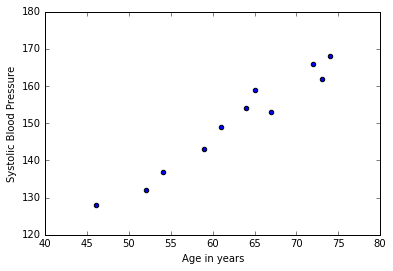

In [90]:
plt.scatter(X[:, 1], X[:, 0])
plt.xlabel('Age in years')
plt.ylabel('Systolic Blood Pressure')
plt.show()

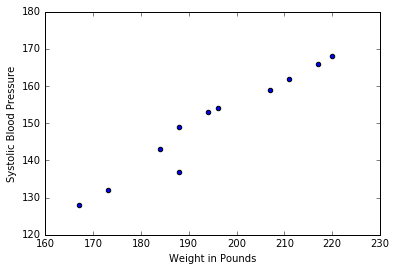

In [91]:
plt.scatter(X[:, 2], X[:, 0])
plt.xlabel('Weight in Pounds')
plt.ylabel('Systolic Blood Pressure')
plt.show()

In [92]:
df['ones'] = 1  # acting as a bias
Y = df['X1']
X = df[['X2', 'X3', 'ones']]

In [93]:
X.head()

,X2,X3,ones
0,52,173,1
1,59,184,1
2,67,194,1
3,73,211,1
4,64,196,1


In [94]:
Y.head()

0    132
1    143
2    153
3    162
4    154
Name: X1, dtype: int64

In [95]:
X2only = df[['X2', 'ones']]
X3only = df[['X3', 'ones']]

In [96]:
def get_r2(X, Y):
    w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
    Yhat = X.dot(w)
    
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    
    return r2

In [97]:
get_r2(X, Y)

0.97684710415020914

In [98]:
get_r2(X2only, Y)

0.95784072081473548

In [99]:
get_r2(X3only, Y)

0.94199520852930652

In [102]:
df.shape

(11, 4)

In [112]:
noise = np.random.randn(df.shape[0])
noise

array([-0.51514111, -0.62308871,  0.80737493,  0.52135171, -0.2109145 ,
       -1.49862124,  1.34569142,  0.18949806,  0.00509039,  1.04633564,
        0.55581418])

In [113]:
# Let's add a pure noise to our explanotory variables
df['noise'] = noise

In [114]:
df.head()

,X1,X2,X3,ones,noise
0,132,52,173,1,-0.515141
1,143,59,184,1,-0.623089
2,153,67,194,1,0.807375
3,162,73,211,1,0.521352
4,154,64,196,1,-0.210914


In [115]:
Y

0     132
1     143
2     153
3     162
4     154
5     168
6     137
7     149
8     159
9     128
10    166
Name: X1, dtype: int64

In [117]:
X = df[['X2', 'X3', 'ones', 'noise']]
X.head()

,X2,X3,ones,noise
0,52,173,1,-0.515141
1,59,184,1,-0.623089
2,67,194,1,0.807375
3,73,211,1,0.521352
4,64,196,1,-0.210914


In [118]:
get_r2(X, Y)

0.97766234291927356